<a href="https://colab.research.google.com/github/soreloserrr/cs102/blob/homework06/homework06/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%223_2_R_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Очень краткое введение в R
> только базовые функции без пакетов

In [13]:
# Задание 1


music <- read.csv("music_genre.csv")
set.seed(31)

music <- music[sample(nrow(music), 20000, replace = FALSE),]
head(music)

if (anyDuplicated(music)) {
music <- unique(music)
}

empty_rows <- subset(music, artist_name == "empty_field")
if (nrow(empty_rows) > 0) {
music <- subset(music, artist_name != "empty_field")
} else {
cat("Дубликатов не содержится")
}
music <- na.omit(music)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
27816,41458,Lil Uzi Vert,Baby Are You Home,61,0.10100,0.653,230296,0.546,0.00e+00,F,0.1340,-8.818,Minor,0.2820,149.975,4-Apr,0.462,Rap
29632,80729,$uicideBoy$,I'm Done.,61,0.07660,0.820,158459,0.875,6.49e-04,A#,0.0883,-6.682,Minor,0.0707,?,4-Apr,0.591,Rap
11319,62636,empty_field,Good Rockin' Daddy - Single Version,40,0.86000,0.740,145120,0.397,0.00e+00,D#,0.3700,-6.726,Major,0.0407,113.835,4-Apr,0.647,Jazz
15934,31221,Cemetery Sun,E.Y.T.Y.K.,43,0.24300,0.529,224973,0.797,0.00e+00,E,0.0508,-4.529,Major,0.0386,?,4-Apr,0.436,Alternative
925,48277,3LAU,Fire - Paris Blohm Remix,46,0.00383,0.613,193552,0.925,1.52e-06,F#,0.0913,-1.579,Minor,0.0622,?,4-Apr,0.467,Electronic
7546,38921,Takatsugu Muramatsu,Magic Science,14,0.16400,0.324,154693,0.357,7.31e-03,C,0.1220,-16.489,Major,0.0483,173.415,3-Apr,0.124,Anime


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Доля каждого жанра в датасете:

Alternative       Anime       Blues   Classical     Country  Electronic 
 0.10052075  0.09762769  0.10178318  0.10083636  0.10052075  0.09773289 
    Hip-Hop        Jazz         Rap        Rock 
 0.09978434  0.10015254  0.10136237  0.09967913 
Самый танцевальный жанр: Hip-Hop 


`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


music_genre,mode
<chr>,<chr>
,
Alternative,Major
Anime,Major
Blues,Major
Classical,Major
Country,Major
Electronic,Major
Hip-Hop,Major
Jazz,Major


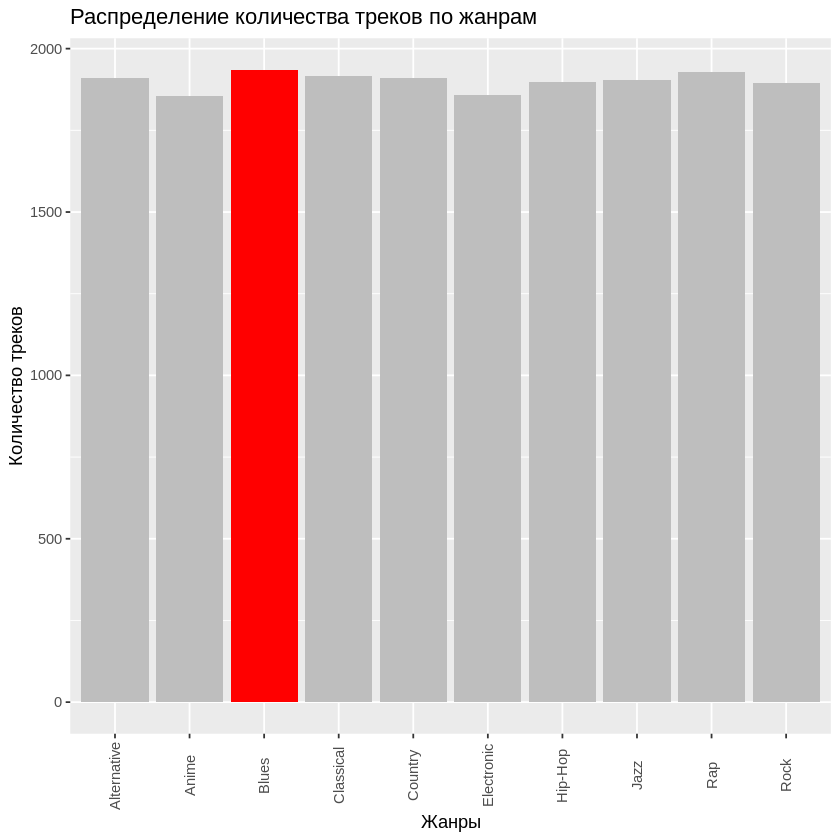

In [19]:
# Задание 2

install.packages("dplyr")
install.packages("ggplot2")
library(dplyr)
library(ggplot2)


#1
genre_props <- prop.table(table(music$music_genre))
cat("Доля каждого жанра в датасете:\n")
print(genre_props)


#2
genre_count <- music %>%
  group_by(music_genre) %>%
  summarize(track_count = n()) %>%
  arrange(desc(track_count))

ggplot(genre_count, aes(x = music_genre, y = track_count)) +
  geom_col(fill = ifelse(genre_count$music_genre[1] == genre_count$music_genre, "red", "grey")) + 
  labs(title = "Распределение количества треков по жанрам",
       x = "Жанры",
       y = "Количество треков") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))



#3
danceability_by_genre <- music %>% 
  group_by(music_genre) %>% 
  summarize(mean_danceability = mean(danceability))
  the_most_danceable_genre <- danceability_by_genre %>% 
  arrange(desc(mean_danceability)) %>% 
  head(1)
cat("Самый танцевальный жанр:", the_most_danceable_genre$music_genre, "\n")

#4
music_genre %>%
  group_by(music_genre, mode) %>%
  summarise(n = n()) %>%
  mutate(prop = n / sum(n)) %>%
  filter(prop == max(prop)) %>%
  select(music_genre, mode)



artist_name,n
<chr>,<int>
鉤貫レム(CV.斉藤壮馬),1
Nobuo Uematsu,190


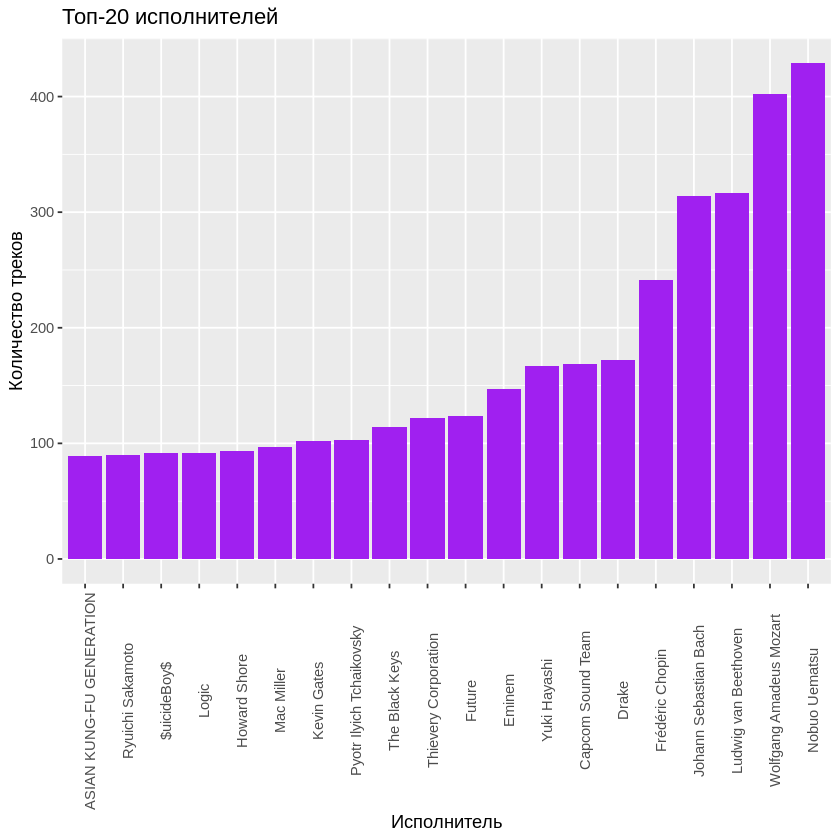

In [7]:
# Задание 3
library(dplyr)
library(ggplot2)
music_genre <- read.csv("music_genre.csv", header = TRUE)

set.seed(31)
music_genre_sample <- music_genre[sample(nrow(music_genre), 20000, replace = FALSE),]

music_genre_clean <- music_genre %>%
  filter(!is.na(artist_name) & artist_name != "empty_field")

set.seed(31)
music_genre_sample <- music_genre_clean[sample(nrow(music_genre_clean), 20000, replace = FALSE),]


#1
music_genre_sample %>%
  count(artist_name) %>%
  arrange(desc(n)) %>%
  slice_tail(n = 1) %>%
  bind_rows(music_genre_sample %>% count(artist_name) %>% arrange(n) %>% tail(n = 1))
  



#2
music_genre_clean <- music_genre %>%
  filter(!is.na(artist_name) & artist_name != "empty_field")

music_genre_clean %>%
  count(artist_name) %>%
  arrange(desc(n)) %>%
  slice(1:20) %>%
  ggplot(aes(x = reorder(artist_name, n), y = n)) +
  geom_col(fill = "purple") +
  theme(axis.text.x = element_text(angle = 90)) +
  ggtitle("Топ-20 исполнителей") +
  labs(y = "Количество треков", x = "Исполнитель")


Вывод: исполнителем с наибольшим количеством треков оказался Nobuo Uematsu, с наименьшим количеством треков - 鉤貫レム(CV.斉藤壮馬)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] 5

[1] -0.2232004

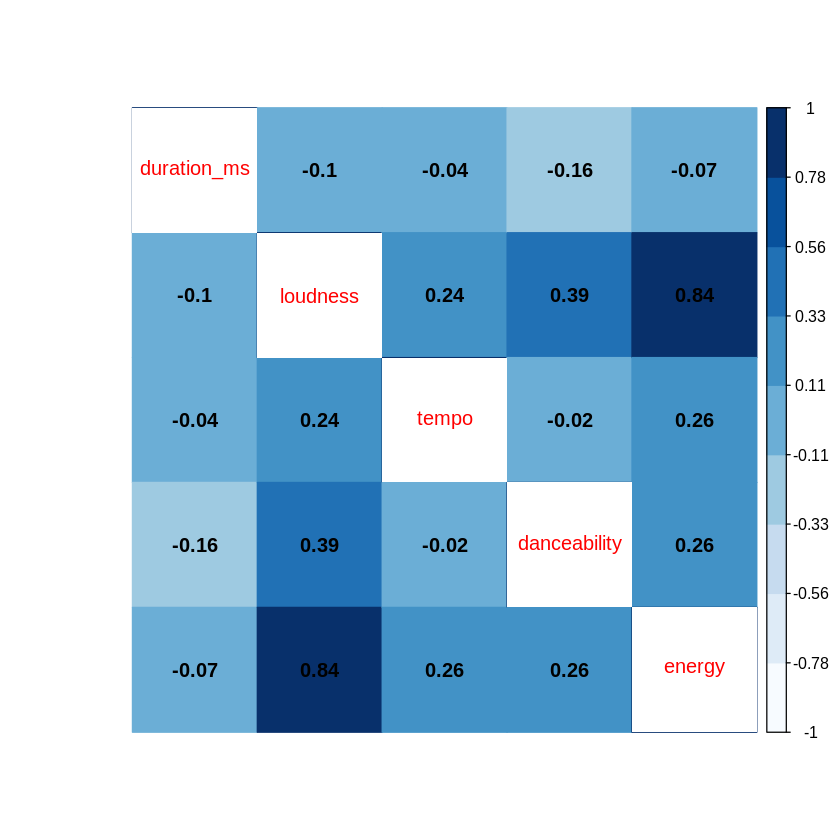

In [ ]:
# Задание 4


install.packages("corrplot")
install.packages("palmerpenguins")
library(corrplot)
library(RColorBrewer)

music_genre <- read.csv("music_genre.csv")

music_genre$tempo <- as.numeric(music_genre$tempo)

music_genre_clean <- na.omit(music_genre[c('duration_ms', 'loudness', 'tempo', 'danceability', 'energy')])
music_genre_clean$tempo <- as.numeric(music_genre_clean$tempo)

cor_mat <- cor(music_genre_clean)

col_ramp <- brewer.pal(9, "Blues")
corrplot(cor_mat, method = "color", tl.pos = "d", addCoef.col = "black", col = col_ramp)

sum(is.na(music_genre$popularity))
music_genre <- na.omit(music_genre)
cor(music_genre$popularity, nchar(as.character(music_genre$track_name)))

In [ ]:
Сильная корреляция между характеристиками loudness и energy. Слабая корреляция между характеристиками duration_ms и danceability. Характеристики, между которыми корреляции практически нет: tempo и danceability.

Warning message:
“Removed 5 rows containing non-finite values (`stat_boxplot()`).”


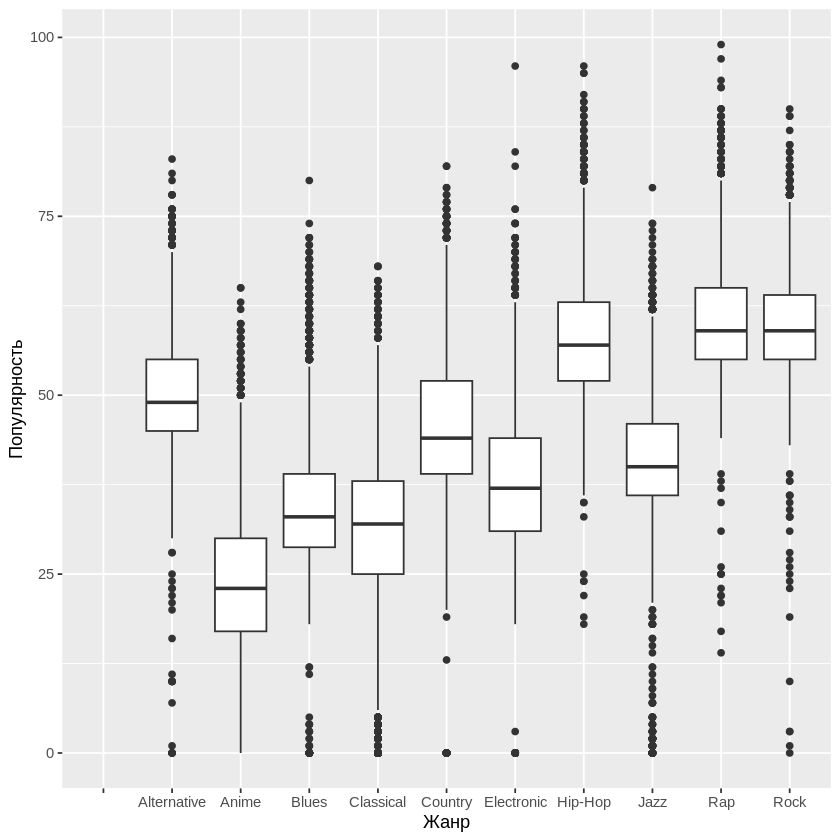

In [ ]:
# Задание 5

install.packages("ggplot2")
library(ggplot2)

music_genre <- read.csv("music_genre.csv")

set.seed(31)
music_genre_sample <- music_genre[sample(nrow(music_genre), 20000, replace = FALSE),]


ggplot(music_genre, aes(x = music_genre, y = popularity)) + 
  geom_boxplot() + 
  xlab("Жанр") + 
  ylab("Популярность")


Между собой похожи такие жанры, как Blues и Classical; Rap, Rock и Hip-Hop

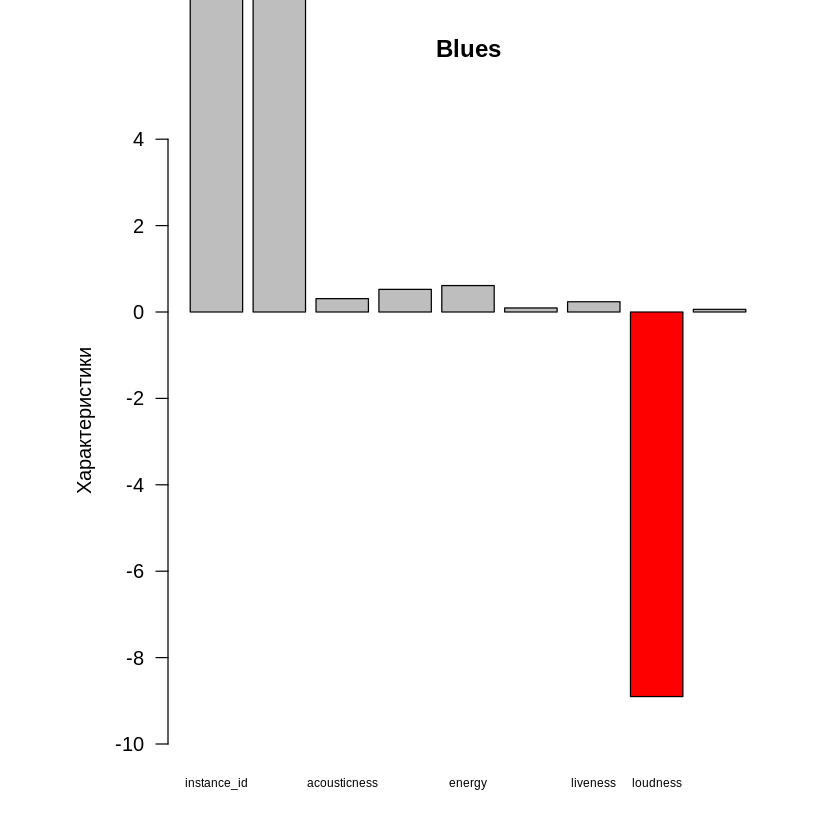

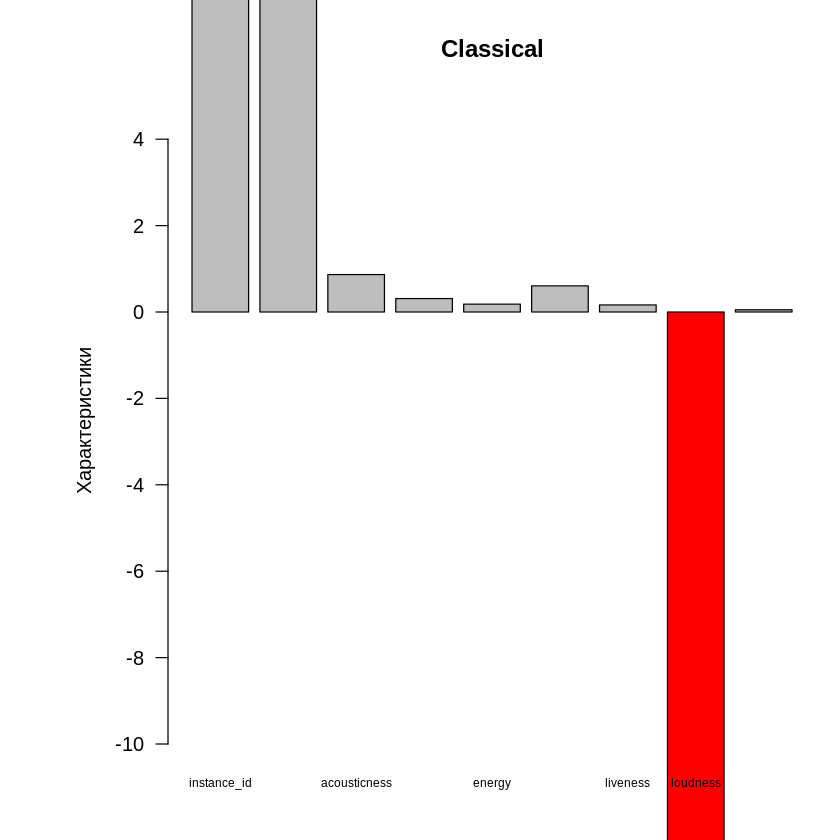

In [17]:
# Задание 7
library(ggplot2)
library(tidyr)
library(dplyr)


data <- music
grouped_data <- music %>% group_by(music_genre)  %>%
                      summarise(status = mean(valence))

most_popular_genre <- (grouped_data %>% filter(max(status) == status))[[1]]
most_unpopular_genre <- (grouped_data %>% filter(min(status) == status))[[1]]
ee <- subset(music, music_genre == most_popular_genre)
yy <- subset(music, music_genre == most_unpopular_genre)

ee <- ee[,!names(ee) %in% c("id", "valence", "duration_ms")]
yy <- yy[,!names(yy) %in% c("id", "valence", "duration_ms")]

ee <- ee[ , unlist(lapply(ee, is.numeric))] 
yy <- yy[ , unlist(lapply(yy, is.numeric))] 

X <- as.numeric(unlist(colMeans(ee)))
Y <- names(unlist(colMeans(ee)))

colors <- ifelse(X < 0, 'red', 'grey')

par(mar=c(4,7,4,3))
barplot(X, names.arg=Y,
        ylab="Характеристики",
        col=colors, 
        main=most_popular_genre, 
        beside=TRUE, 
        cex.names=0.6, 
        ylim=c(-10, 5), 
        las=1)

X <- as.numeric(unlist(colMeans(yy)))
Y <- names(unlist(colMeans(yy)))

colors <- ifelse(X < 0, 'red', 'grey')

par(mar=c(4,7,4,1))
barplot(X, names.arg=Y,
        ylab="Характеристики",
        col=colors, 
        main=most_unpopular_genre, 
        beside=TRUE, 
        cex.names=0.6, 
        ylim=c(-10, 5), 
        las=1)


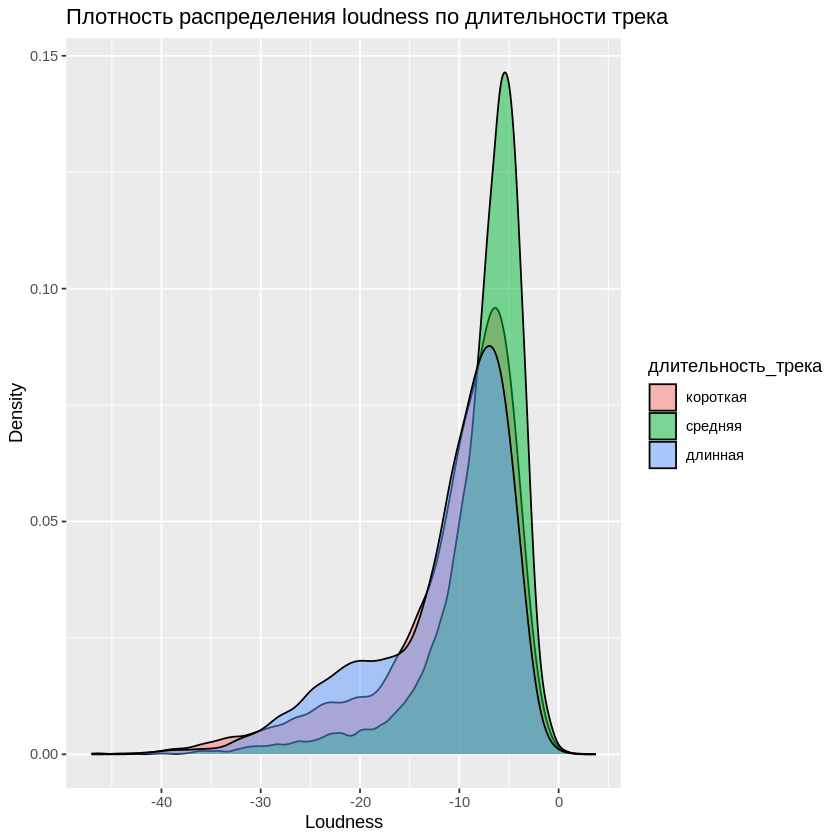

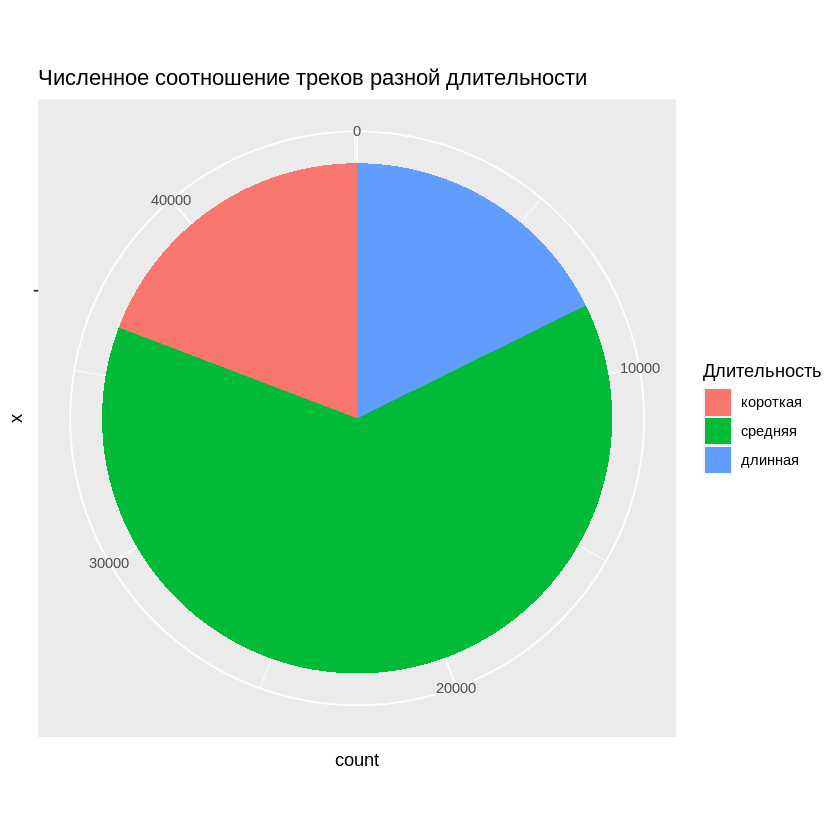

In [28]:
# Задание 8
library(ggplot2)
music_genre <- read.csv("music_genre.csv")

set.seed(31)
music_genre_sample <- music_genre[sample(nrow(music_genre), 20000, replace = FALSE),]


#1
music_genre$длительность_трека <- cut(music_genre$duration_ms/1000/60, 
                                      breaks = c(0, 3, 5, Inf), 
                                      labels = c("короткая", "средняя", "длинная"),
                                      include.lowest = TRUE)


#2
ggplot(na.omit(music_genre), aes(x = loudness, fill = длительность_трека)) + 
  geom_density(alpha = 0.5) +
  xlab("Loudness") +
  ylab("Density") +
  ggtitle("Плотность распределения loudness по длительности трека")


#3
ggplot(na.omit(music_genre), aes(x = "", fill = длительность_трека)) + 
  geom_bar(width = 1) +
  coord_polar("y", start=0) +
  labs(fill = "Длительность") +
  ggtitle("Численное соотношение треков разной длительности")         


`R` - объектно-ориентированный, интерпретируемый язык программирования для анализа данных, появившийся в начале 90-х. Достаточно мощное средство для статистического анализа данных, визуализации, а также решения задач машинного обучения. Можно использовать через [Google Colab](https://colab.to/r) или скачать и установить [RStudio](https://www.rstudio.com/) или плагин для `PyCharm` или `DataSpell`.


## Cоздаем DataFrame из векторов

In [ ]:
df <- data.frame(c(10, 20, 30), c(11, 21, 31))
df

c.10..20..30.,c.11..21..31.
<dbl>,<dbl>
10,11
20,21
30,31


Создаем таблицу с именованными столбцами

In [ ]:
df <- data.frame(col_1=c(10, 20, 30), col_2=c(11, 21, 31))
df

col_1,col_2
<dbl>,<dbl>
10,11
20,21
30,31


In [ ]:
print(df)

  col_1 col_2
1    10    11
2    20    21
3    30    31


Задаем имена столбцов после создания датафрейма

In [ ]:
colnames(df) <- c("A", "B")
df

A,B
<dbl>,<dbl>
10,11
20,21
30,31


Чаще всего датафреймы создаются путём считывания данных из CSV-файла с помощью функции read.csv. В качестве примера в этом и нескольких следующих блокнотах будем использовать датасет с kaggle про [270 самых популярных программистских книг](https://www.kaggle.com/thomaskonstantin/top-270-rated-computer-science-programing-books?select=prog_book.csv).

Какие данные у нас есть?
271 строка и 7 столбцов:
* `Rating` - рейтинг книги от 0 до 5
* `Reviews` - количество отзывов
* `Book_title` - название книги
* `Description` - аннотация
* `Number_of_pages` - количество страниц
* `Type` - тип (электронная / в твердом переплете / в мягком переплете и др.)
* `Price` - усредненная цена (в долларах) по нескольким источникам

Обращайте внимание на разделитель. Вот этот код в зависимости от среды, где запускается файл, может выдать ошибку или некорректно считать данные. Перед запуском убедитесь в том, что загрузили этот файл в коллаб.

`Google Colab` пока не сделал адекватную аутентификацию для `R`, поэтому по-старинке будем загружать файлы в локальную сессию.

In [ ]:
read.csv("prog_book.csv", header = TRUE)

Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
4.17,"3,829",The Elements of Style,"This style manual offers practical advice on improving writing skills. Throughout, the emphasis is on promoting a plain English style. This little book can help you communicate more effectively by showing you how to enliven your sentences.",105,Hardcover,9.323529
4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers Chaos and Genius, now brings us a work just as astonishing and masterly: a revelatory chronicle and meditation that shows how information has become the modern era’s defining quality—the blood, the fuel, the vital principle of our world. The story of information begins in a time profoundly unlike our own, when every thought and ...more",527,Hardcover,11.000000
3.33,0,Responsive Web Design Overview For Beginners,"In Responsive Web Design Overview For Beginners, you'll get an overview of what to expect when building a responsive website. You'll learn about all of the following: Responsive Web Design Overview Usability of Smaller Screens Why Plugins Aren't the Solution Why a Responsive Web Design Theme May Not Be Best for Your Existing Website Risks Involved with Responsive Web Design F ...more",50,Kindle Edition,11.267647
3.97,"1,658",Ghost in the Wires: My Adventures as the World's Most Wanted Hacker,"If they were a hall of fame or shame for computer hackers, a Kevin Mitnick plaque would be mounted the near the entrance. While other nerds were fumbling with password possibilities, this adept break-artist was penetrating the digital secrets of Sun Microsystems, Digital Equipment Corporation, Nokia, Motorola, Pacific Bell, and other mammoth enterprises. His Ghost in the W ...more",393,Hardcover,12.873529
4.06,"1,325",How Google Works,"Both Eric Schmidt and Jonathan Rosenberg came to Google as seasoned Silicon Valley business executives, but over the course of a decade they came to see the wisdom in Coach John Wooden's observation that 'it's what you learn after you know it all that counts'. As they helped grow Google from a young start-up to a global icon, they relearned everything they knew about manag ...more",305,Kindle Edition,13.164706
3.84,117,The Meme Machine,"What is a meme? First coined by Richard Dawkins in 'The Selfish Gene', a meme is any idea, behavior, or skill that can be transferred from one person to another by imitation: stories, fashions, inventions, recipes, songs, ways of plowing a field or throwing a baseball or making a sculpture. The meme is also one of the most important--and controversial--concepts to emerge s ...more",288,Paperback,14.188235
4.09,"5,938",Start with Why: How Great Leaders Inspire Everyone to Take Action,"Why do you do what you do? Why are some people and organizations more innovative, more influential, and more profitable than others? Why do some command greater loyalty from customers and employees alike? Even among the successful, why are so few able to repeat their success over and over? People like Martin Luther King Jr., Steve Jobs, and the Wright Brothers might have lit ...more",256,Hardcover,14.232353
4.15,"1,817",Algorithms to Live By: The Computer Science of Human Decisions,"A fascinating exploration of how insights from computer algorithms can be applied to our everyday lives, helping to solve common decision-making problems and illuminate the workings of the human mind All our lives are constrained by limited space and time, limits that give rise to a particular set of problems. What should we do, or leave undone, in a day or a lifetime? How ...more",368,Hardcover,14.364706
3.87,"2,093",Weapons of Math Destruction: How Big Data Increases Inequality and Threatens Democracy,"A former Wall Street quant sounds an alarm on mathematical modeling—a pervasive new force in society that threatens to undermine democracy and widen inequality. We live in the age of the algorithm. Increa

In [ ]:
head(read.csv("prog_book.csv", header = TRUE, sep = ","))

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
1,4.17,"3,829",The Elements of Style,"This style manual offers practical advice on improving writing skills. Throughout, the emphasis is on promoting a plain English style. This little book can help you communicate more effectively by showing you how to enliven your sentences.",105,Hardcover,9.323529
2,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers Chaos and Genius, now brings us a work just as astonishing and masterly: a revelatory chronicle and meditation that shows how information has become the modern era’s defining quality—the blood, the fuel, the vital principle of our world. The story of information begins in a time profoundly unlike our own, when every thought and ...more",527,Hardcover,11.000000
3,3.33,0,Responsive Web Design Overview For Beginners,"In Responsive Web Design Overview For Beginners, you'll get an overview of what to expect when building a responsive website. You'll learn about all of the following: Responsive Web Design Overview Usability of Smaller Screens Why Plugins Aren't the Solution Why a Responsive Web Design Theme May Not Be Best for Your Existing Website Risks Involved with Responsive Web Design F ...more",50,Kindle Edition,11.267647
4,3.97,"1,658",Ghost in the Wires: My Adventures as the World's Most Wanted Hacker,"If they were a hall of fame or shame for computer hackers, a Kevin Mitnick plaque would be mounted the near the entrance. While other nerds were fumbling with password possibilities, this adept break-artist was penetrating the digital secrets of Sun Microsystems, Digital Equipment Corporation, Nokia, Motorola, Pacific Bell, and other mammoth enterprises. His Ghost in the W ...more",393,Hardcover,12.873529
5,4.06,"1,325",How Google Works,"Both Eric Schmidt and Jonathan Rosenberg came to Google as seasoned Silicon Valley business executives, but over the course of a decade they came to see the wisdom in Coach John Wooden's observation that 'it's what you learn after you know it all that counts'. As they helped grow Google from a young start-up to a global icon, they relearned everything they knew about manag ...more",305,Kindle Edition,13.164706
6,3.84,117,The Meme Machine,"What is a meme? First coined by Richard Dawkins in 'The Selfish Gene', a meme is any idea, behavior, or skill that can be transferred from one person to another by imitation: stories, fashions, inventions, recipes, songs, ways of plowing a field or throwing a baseball or making a sculpture. The meme is also one of the most important--and controversial--concepts to emerge s ...more",288,Paperback,14.188235


Функция read.csv предоставляет широкий список тонких настроек считывания данных. Здесь рассмотрим лишь некоторые из них. 

Можно считывать не все строки и не все столбцы. Столбцы:

In [ ]:
head(read.csv("prog_book.csv", header=TRUE, colClasses=c("numeric", "NULL", "factor", "NULL", "NULL", "NULL", "NULL")))

,Rating,Book_title
,<dbl>,<fct>
1,4.17,The Elements of Style
2,4.01,"The Information: A History, a Theory, a Flood"
3,3.33,Responsive Web Design Overview For Beginners
4,3.97,Ghost in the Wires: My Adventures as the World's Most Wanted Hacker
5,4.06,How Google Works
6,3.84,The Meme Machine


строки

In [ ]:
head(read.csv("prog_book.csv", header=TRUE, nrows=3))

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
1,4.17,"3,829",The Elements of Style,"This style manual offers practical advice on improving writing skills. Throughout, the emphasis is on promoting a plain English style. This little book can help you communicate more effectively by showing you how to enliven your sentences.",105,Hardcover,9.323529
2,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers Chaos and Genius, now brings us a work just as astonishing and masterly: a revelatory chronicle and meditation that shows how information has become the modern era’s defining quality—the blood, the fuel, the vital principle of our world. The story of information begins in a time profoundly unlike our own, when every thought and ...more",527,Hardcover,11.000000
3,3.33,0,Responsive Web Design Overview For Beginners,"In Responsive Web Design Overview For Beginners, you'll get an overview of what to expect when building a responsive website. You'll learn about all of the following: Responsive Web Design Overview Usability of Smaller Screens Why Plugins Aren't the Solution Why a Responsive Web Design Theme May Not Be Best for Your Existing Website Risks Involved with Responsive Web Design F ...more",50,Kindle Edition,11.267647


In [ ]:
books <- read.csv("prog_book.csv", header=TRUE, colClasses=c("numeric", "factor", "factor", "NULL", "numeric", "factor", "numeric"))
head(books)

,Rating,Reviews,Book_title,Number_Of_Pages,Type,Price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,4.17,"3,829",The Elements of Style,105,Hardcover,9.323529
2,4.01,"1,406","The Information: A History, a Theory, a Flood",527,Hardcover,11.000000
3,3.33,0,Responsive Web Design Overview For Beginners,50,Kindle Edition,11.267647
4,3.97,"1,658",Ghost in the Wires: My Adventures as the World's Most Wanted Hacker,393,Hardcover,12.873529
5,4.06,"1,325",How Google Works,305,Kindle Edition,13.164706
6,3.84,117,The Meme Machine,288,Paperback,14.188235


#### количество элементов

### Свойства

Мы узнали, как создать датафреймы в R. Дадим описание основных свойств этой структуры. 


In [ ]:
nrow(books)
ncol(books)

[1] 271

[1] 6

#### количество уникальных элементов

In [ ]:
unique(books$Type)

[1] Hardcover             Kindle Edition        Paperback            
[4] ebook                 Unknown Binding       Boxed Set - Hardcover
6 Levels: Boxed Set - Hardcover ebook Hardcover Kindle Edition ... Unknown Binding

In [ ]:
length(unique(books$Type))

[1] 6

In [ ]:
length(unique(books$Number_Of_Pages))

[1] 185

In [ ]:
unique(books["Type"])

,Type
,<fct>
1,Hardcover
3,Kindle Edition
6,Paperback
55,ebook
86,Unknown Binding
269,Boxed Set - Hardcover


In [ ]:
colnames(books)

[1] "Rating"          "Reviews"         "Book_title"      "Number_Of_Pages"
[5] "Type"            "Price"

In [ ]:
rownames(books)

[1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110" "111" "112" "113" "114" "115" "116" "117" "118" "119" "120"
[121] "121" "122" "123" "124" "125" "126" "127" "128" "129" "130" "131" "132"
[133] "133" "134" "135" "136" "137" "138" "139" "140" "141" "142" "143" "144"
[145] "145" "146" "147" "148" "149" "150" "151" "152" "153" "154" "155" "156"
[157] "157" "158" "159" "160" "161" "162" "163" "164" "165" "166" "167" "168"
[169] "169" "170" "171" "172" "173" "174" "175" "176" "177" "178" "179" "180"
[181] "181" "182" "183" "184" "185" "186" "187" "188" "189" "190" "191" "192"
[193] "193" "194" "195" "196" "197" "198" "199" "200" "201" "202" "203" "204"
[205] "205" "206" "207" "208" "209" "210" "211" "212" "213" "214" "215" "216"
[217] "217" "218" "219" "220" "221" "222" "223" "224" "225" "226" "227" "228"
[229] "229" "230" "231" "232" "233" "234" "235" "236" "237" "238" "239" "240"
[241] "241" "242" "243" "244" "245" "246" "247" "248" "249" "250" "251" "252"
[253] "253" "254" "255" "256" "257" "258" "259" "260" "261" "262" "263" "264"
[265] "265" "266" "267" "268" "269" "270" "271"

### Вывод значений

#### первые / последние строки

В данном разделе будут показаны несколько способов вывода значений DataFrame. R предлагает функции head() и tail() для исследования первых или последних строк, а также sample() для выбора случайных строк.

In [ ]:
head(books, n=2)

,Rating,Reviews,Book_title,Number_Of_Pages,Type,Price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,4.17,"3,829",The Elements of Style,105,Hardcover,9.323529
2,4.01,"1,406","The Information: A History, a Theory, a Flood",527,Hardcover,11.000000


In [ ]:
tail(books, n=2)

,Rating,Reviews,Book_title,Number_Of_Pages,Type,Price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
270,4.77,4,"The Art of Computer Programming, Volumes 1-4a Boxed Set",3168,Hardcover,220.3853
271,3.84,5,A Discipline for Software Engineering,789,Hardcover,235.6500


In [ ]:
books[sample(nrow(books), 2),]

,Rating,Reviews,Book_title,Number_Of_Pages,Type,Price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
265,3.82,0,Game Programming Gems 3,663,Hardcover,143.13824
9,3.87,"2,093",Weapons of Math Destruction: How Big Data Increases Inequality and Threatens Democracy,259,Hardcover,14.50294


In [ ]:
head(books[c("Book_title", "Number_Of_Pages")], n=2)

,Book_title,Number_Of_Pages
,<fct>,<dbl>
1,The Elements of Style,105
2,"The Information: A History, a Theory, a Flood",527


In [ ]:
head(books$Book_title, n=3)

[1] The Elements of Style                        
[2] The Information: A History, a Theory, a Flood
[3] Responsive Web Design Overview For Beginners 
271 Levels: 3D Game Engine Architecture: Engineering Real-Time Applications with Wild Magic (The Morgan Kaufmann Series in Interactive 3d Technology) ...

#### индексация в R

In [ ]:
books[1,] # первая строка

,Rating,Reviews,Book_title,Number_Of_Pages,Type,Price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,4.17,"3,829",The Elements of Style,105,Hardcover,9.323529


In [ ]:
books[12,]

,Rating,Reviews,Book_title,Number_Of_Pages,Type,Price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
12,3.78,481,The Master Algorithm: How the Quest for the Ultimate Learning Machine Will Remake Our World,352,Hardcover,15.22941


In [ ]:
head(books[,3], n=3) # третий столбец

[1] The Elements of Style                        
[2] The Information: A History, a Theory, a Flood
[3] Responsive Web Design Overview For Beginners 
271 Levels: 3D Game Engine Architecture: Engineering Real-Time Applications with Wild Magic (The Morgan Kaufmann Series in Interactive 3d Technology) ...

In [ ]:
books[12, 3]

[1] The Master Algorithm: How the Quest for the Ultimate Learning Machine Will Remake Our World
271 Levels: 3D Game Engine Architecture: Engineering Real-Time Applications with Wild Magic (The Morgan Kaufmann Series in Interactive 3d Technology) ...

In [ ]:
books[c(1,12),]

,Rating,Reviews,Book_title,Number_Of_Pages,Type,Price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,4.17,"3,829",The Elements of Style,105,Hardcover,9.323529
12,3.78,481,The Master Algorithm: How the Quest for the Ultimate Learning Machine Will Remake Our World,352,Hardcover,15.229412


In [ ]:
books[c(1:3),]

,Rating,Reviews,Book_title,Number_Of_Pages,Type,Price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,4.17,"3,829",The Elements of Style,105,Hardcover,9.323529
2,4.01,"1,406","The Information: A History, a Theory, a Flood",527,Hardcover,11.000000
3,3.33,0,Responsive Web Design Overview For Beginners,50,Kindle Edition,11.267647


In [ ]:
books[c(1:3),c(3,5)]

,Book_title,Type
,<fct>,<fct>
1,The Elements of Style,Hardcover
2,"The Information: A History, a Theory, a Flood",Hardcover
3,Responsive Web Design Overview For Beginners,Kindle Edition


In [ ]:
books[c(1,12), c("Book_title", "Number_Of_Pages")]

,Book_title,Number_Of_Pages
,<fct>,<dbl>
1,The Elements of Style,105
12,The Master Algorithm: How the Quest for the Ultimate Learning Machine Will Remake Our World,352


#### транспонирование

In [ ]:
t(books[c(1:3),])

,1,2,3
Rating,4.17,4.01,3.33
Reviews,"3,829","1,406",0
Book_title,The Elements of Style,"The Information: A History, a Theory, a Flood",Responsive Web Design Overview For Beginners
Number_Of_Pages,105,527,50
Type,Hardcover,Hardcover,Kindle Edition
Price,9.323529,11.000000,11.267647


In [ ]:
colnames(books) <- c("rating", "reviews", "title", "pages", "type", "price")

### Фильтрация по условию

В базовом R фильтрация по условия осуществляется засчет манипуляций с индексами 

Посмотрим примеры.


In [ ]:
head(books, n=2)

,rating,reviews,title,pages,type,price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,4.17,"3,829",The Elements of Style,105,Hardcover,9.323529
2,4.01,"1,406","The Information: A History, a Theory, a Flood",527,Hardcover,11.000000


Запятая после условия здесь означает, что мы работаем со строками, а столбцы берем все.

In [ ]:
books[books$pages >= 1000, ]

,rating,reviews,title,pages,type,price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
87,3.22,2,Beginning Java 2,1200,Paperback,36.61765
130,3.96,53,PHP and MySQL Web Development (Developer's Library),1008,Paperback,45.32647
138,4.62,28,The Linux Programming Interface: A Linux and Unix System Programming Handbook,1506,Hardcover,46.35882
204,3.96,150,Learning Python,1214,Paperback,67.87353
207,4.08,92,The C++ Programming Language,1040,Hardcover,69.37941
233,3.77,28,Database System Concepts,1142,Hardcover,85.60588
241,4.33,194,Introduction to Algorithms,1180,Hardcover,92.25588
246,4.35,21,Game Engine Architecture,1052,Hardcover,96.03235
250,4.03,1,Geometric Tools for Computer Graphics,1056,Hardcover,99.82941


Синтаксис, отчасти похожий на метод .isin() в pandas.

In [ ]:
books[books$type %in% c("Hardcover", "Paperback"),]

,rating,reviews,title,pages,type,price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,4.17,"3,829",The Elements of Style,105,Hardcover,9.323529
2,4.01,"1,406","The Information: A History, a Theory, a Flood",527,Hardcover,11.000000
4,3.97,"1,658",Ghost in the Wires: My Adventures as the World's Most Wanted Hacker,393,Hardcover,12.873529
6,3.84,117,The Meme Machine,288,Paperback,14.188235
7,4.09,"5,938",Start with Why: How Great Leaders Inspire Everyone to Take Action,256,Hardcover,14.232353
8,4.15,"1,817",Algorithms to Live By: The Computer Science of Human Decisions,368,Hardcover,14.364706
9,3.87,"2,093",Weapons of Math Destruction: How Big Data Increases Inequality and Threatens Democracy,259,Hardcover,14.502941
10,4.62,0,ZX Spectrum Games Code Club: Twenty fun games to code and learn,128,Paperback,14.641176
11,4.03,160,Sync: The Emerging Science of Spontaneous Order,352,Hardcover,15.229412


Применение множественного условия.

In [ ]:
books[books$pages >= 1000 & books$type == "Paperback",]

,rating,reviews,title,pages,type,price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
87,3.22,2,Beginning Java 2,1200,Paperback,36.61765
130,3.96,53,PHP and MySQL Web Development (Developer's Library),1008,Paperback,45.32647
204,3.96,150,Learning Python,1214,Paperback,67.87353
254,4.11,56,"Modern Operating Systems, 4th Edition",1136,Paperback,103.46176
268,3.94,22,An Introduction to Database Systems,1040,Paperback,212.09706


Правило может быть вынесено в отдельную переменную.

In [ ]:
rule <- books$pages %in% c(256,288)
head(books[rule,], n=5)

,rating,reviews,title,pages,type,price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
6,3.84,117,The Meme Machine,288,Paperback,14.18824
7,4.09,"5,938",Start with Why: How Great Leaders Inspire Everyone to Take Action,256,Hardcover,14.23235
16,3.95,417,Kingpin: How One Hacker Took Over the Billion-Dollar Cybercrime Underground,288,Hardcover,16.07353
29,3.96,1,Computability and Unsolvability,288,Paperback,20.40000
85,3.83,278,Automate This: How Algorithms Came to Rule Our World,256,Hardcover,35.84118


### Добавление столбцов

In [ ]:
books_copy <- copy(books)

In [ ]:
books_copy$RoundedPrice <- round(books_copy$price)
head(books_copy, n=3)

,rating,reviews,title,pages,type,price,RoundedPrice
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
1,4.17,"3,829",The Elements of Style,105,Hardcover,9.323529,9
2,4.01,"1,406","The Information: A History, a Theory, a Flood",527,Hardcover,11.000000,11
3,3.33,0,Responsive Web Design Overview For Beginners,50,Kindle Edition,11.267647,11


### Сортировка

Сортировка также производится через индексы, но с использованием функции order() для матриц и sort() для векторов.

In [ ]:
head(books[order(books$price, decreasing=TRUE),], n=5)

,rating,reviews,title,pages,type,price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
271,3.84,5,A Discipline for Software Engineering,789,Hardcover,235.6500
269,4.49,36,"The Art of Computer Programming, Volumes 1-3 Boxed Set",896,Boxed Set - Hardcover,220.3853
270,4.77,4,"The Art of Computer Programming, Volumes 1-4a Boxed Set",3168,Hardcover,220.3853
268,3.94,22,An Introduction to Database Systems,1040,Paperback,212.0971
267,3.76,0,3D Game Engine Architecture: Engineering Real-Time Applications with Wild Magic (The Morgan Kaufmann Series in Interactive 3d Technology),752,Hardcover,203.1088


#### наименьшее / наибольшее значение

In [ ]:
max(books$price)

[1] 235.65

In [ ]:
min(books$pages)

[1] 50

Отобрать топ значений принзнака в R несколько сложнее, чем в pandas. Снова нужно прибегать к логике срезов и индексов.

In [ ]:
books[books$rating %in% sort(books$rating)[1:5],]

,rating,reviews,title,pages,type,price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
25,3.20,0,Game Programming Golden Rules,318,Paperback,19.15294
87,3.22,2,Beginning Java 2,1200,Paperback,36.61765
178,3.00,0,Advanced Game Programming: A Gamedev.Net Collection,464,Paperback,59.08235
183,3.00,0,Cross-Platform Game Programming (Game Development) (Charles River Media Game Development),460,Paperback,60.39118
188,3.00,0,"Lambda-Calculus, Combinators and Functional Programming",192,Paperback,61.16765


In [ ]:
books[books$rating %in% sort(books$rating, decreasing=TRUE)[-6:-nrow(books)],]

,rating,reviews,title,pages,type,price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
55,5.00,0,Your First App: Node.js,317,ebook,25.85588
115,4.67,1,Build Web Applications with Java: Learn every aspect to build web applications from scratch,372,Paperback,42.27647
132,4.72,362,"Designing Data-Intensive Applications: The Big Ideas Behind Reliable, Scalable, and Maintainable Systems",616,Paperback,45.56176
195,4.67,78,"Fluent Python: Clear, Concise, and Effective Programming",792,Paperback,64.09118
270,4.77,4,"The Art of Computer Programming, Volumes 1-4a Boxed Set",3168,Hardcover,220.38529


# Обработка пустых значений

создаем датафрейм с 5 строками и 3 столбцами

In [ ]:
df <- data.frame(c1=c(0,3,6,9,12,15,NaN), 
                 c2=c(1,4,7,10,13,16,NaN), 
                 c3=c(2,5,8,11,14,17,NaN),
                 c4=c(20,NaN,NaN,NaN,NaN,18,NaN),
                 c5=c(NaN,NaN,NaN,NaN,NaN,NaN,NaN))
df

c1,c2,c3,c4,c5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,2,20,NaN
3,4,5,NaN,NaN
6,7,8,NaN,NaN
9,10,11,NaN,NaN
12,13,14,NaN,NaN
15,16,17,18,NaN
NaN,NaN,NaN,NaN,NaN


Найдем все пустые ячейки.

In [ ]:
is.na(df)

c1,c2,c3,c4,c5
FALSE,FALSE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE


Посчитаем количество пустых ячеек в каждом столбце и выведем в формате таблицы.

In [ ]:
t(colSums(is.na(df)))

c1,c2,c3,c4,c5
1,1,1,5,7


Посчитаем количество непустых ячеек в каждом столбце и выведем в формате таблицы.

In [ ]:
t(colSums(!is.na(df)))

c1,c2,c3,c4,c5
6,6,6,2,0


# Сводка статистик

Получаем сводку статистик для датафрейма. Это не датафрейм, но обращаться по индексу к отдельным столбцам и строкам в них можно.

In [ ]:
summary(books)

     rating         reviews   
 Min.   :3.000   0      : 22  
 1st Qu.:3.915   1      : 16  
 Median :4.100   2      :  8  
 Mean   :4.067   3      :  8  
 3rd Qu.:4.250   11     :  7  
 Max.   :5.000   4      :  7  
                 (Other):203  
                                                                                                                                       title    
 3D Game Engine Architecture: Engineering Real-Time Applications with Wild Magic (The Morgan Kaufmann Series in Interactive 3d Technology):  1  
 3D Game Engine Design: A Practical Approach to Real-Time Computer Graphics (The Morgan Kaufmann Series in Interactive 3D Technology)     :  1  
 3D Math Primer for Graphics and Game Development                                                                                         :  1  
 97 Things Every Programmer Should Know: Collective Wisdom from the Experts                                                               :  1  
 A Discipline for Software 

In [ ]:
t(summary(books$type))

Boxed Set - Hardcover,ebook,Hardcover,Kindle Edition,Paperback,Unknown Binding
1,7,95,10,156,2


### Арифметические операции

- задаем стартовое значение генератора случайных чисел для получения воспроизводимых результатов
- создаем объект DataFrame

In [ ]:
df <- data.frame(A=runif(n=5, min=-10, max=10),
                 B=runif(n=5, min=-10, max=10),
                 C=runif(n=5, min=-10, max=10),
                 D=runif(n=5, min=-10, max=10))
df

A,B,C,D
<dbl>,<dbl>,<dbl>,<dbl>
4.85341383,-5.501308,-6.377070,-5.123532
-0.08919005,-2.780199,-5.925521,6.904991
-3.69052613,8.795139,-7.987127,7.834318
7.30803882,-2.325721,7.590818,-5.394721
5.96548661,2.459218,-9.814508,-1.260426


умножаем все на 2, берём только абсолютные значения

In [ ]:
abs(df * 2)

A,B,C,D
<dbl>,<dbl>,<dbl>,<dbl>
9.7068277,11.002616,12.75414,10.247063
0.1783801,5.560399,11.85104,13.809982
7.3810523,17.590277,15.97425,15.668636
14.6160776,4.651442,15.18164,10.789442
11.9309732,4.918436,19.62902,2.520852


Вычесть вектор из матрицы в R не получится. Вспомним здесь еще раз про то, как R воспринимает индексацию.

> `df[1] != df[1,]`

In [ ]:
df[1,]

,A,B,C,D
,<dbl>,<dbl>,<dbl>,<dbl>
1,4.853414,-5.501308,-6.37707,-5.123532


In [ ]:
df[1]

A
<dbl>
4.85341383
-0.08919005
-3.69052613
7.30803882
5.96548661


### Одномерные статистики

#### cреднее значение / медиана / мода

Вычислим среднее значение по столбцу с ценой

In [ ]:
mean(books$price)

[1] 54.54186

Вычислим медиану, для моды в R нет специальной функции

In [ ]:
median(books$rating)

[1] 4.1

#### [дисперсия](https://ru.wikipedia.org/wiki/Дисперсия_случайной_величины) / среднеквадратичное отклонение

Вычислим дисперсию рейтинга

In [ ]:
var(books$rating)

ERROR: ignored

И стандартное отклонение

In [ ]:
sd(books$price)

ERROR: ignored

#### [корреляция](https://ru.wikipedia.org/wiki/Корреляция)

Между двумя числовыми столбцами можно посчитать коэффициент корреляции Пирсона, Кенделла (ранговая) или Спирмена (показывает, как отличается полученная при наблюдении сумма квадратов разностей между рангами от случая отсутствия связи.). 

In [ ]:
cor(books$pages,books$price)

[1] 0.6369506

Корреляционную матрицу можно построить только для числовых столбцов.

In [ ]:
round(cor(books[c("pages", "price", "rating")]), 2)

,pages,price,rating
pages,1.00,0.64,0.13
price,0.64,1.00,0.05
rating,0.13,0.05,1.00


## Раздение и объединение векторов и таблиц

Разделим табличку с книгами по условию: в одной будет цена больше 100 долларов, во второй - меньше.

In [ ]:
up <- subset(books, price > 100)
down <- subset(books, price <= 100)

In [ ]:
nrow(up)
nrow(down)

[1] 21

[1] 250

Теперь объединим таблицы обратно. Для горизонтального склеивания таблиц есть функция rbind().

In [ ]:
rbind(down, up)

,rating,reviews,title,pages,type,price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,4.17,"3,829",The Elements of Style,105,Hardcover,9.323529
2,4.01,"1,406","The Information: A History, a Theory, a Flood",527,Hardcover,11.000000
3,3.33,0,Responsive Web Design Overview For Beginners,50,Kindle Edition,11.267647
4,3.97,"1,658",Ghost in the Wires: My Adventures as the World's Most Wanted Hacker,393,Hardcover,12.873529
5,4.06,"1,325",How Google Works,305,Kindle Edition,13.164706
6,3.84,117,The Meme Machine,288,Paperback,14.188235
7,4.09,"5,938",Start with Why: How Great Leaders Inspire Everyone to Take Action,256,Hardcover,14.232353
8,4.15,"1,817",Algorithms to Live By: The Computer Science of Human Decisions,368,Hardcover,14.364706
9,3.87,"2,093",Weapons of Math Destruction: How Big Data Increases Inequality and Threatens Democracy,259,Hardcover,14.502941


Разобьем по вертикали таблицу на две: по 4 и 2 два столбца.

In [ ]:
left <- books[1:4]
right <- books[5:6]
ncol(left)
ncol(right)

[1] 4

[1] 2

In [ ]:
head(left, n=2)

,rating,reviews,title,pages
,<dbl>,<fct>,<fct>,<dbl>
1,4.17,"3,829",The Elements of Style,105
2,4.01,"1,406","The Information: A History, a Theory, a Flood",527


Склеим обратно с помощью cbind().

In [ ]:
head(cbind(right, left), n=2)

,type,price,rating,reviews,title,pages
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
1,Hardcover,9.323529,4.17,"3,829",The Elements of Style,105
2,Hardcover,11.000000,4.01,"1,406","The Information: A History, a Theory, a Flood",527


Проверим, что исходная табличка была такой же.

In [ ]:
head(books, n=2)

,rating,reviews,title,pages,type,price
,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,4.17,"3,829",The Elements of Style,105,Hardcover,9.323529
2,4.01,"1,406","The Information: A History, a Theory, a Flood",527,Hardcover,11.000000


Теперь посмотрим на слияние таблиц: для этого есть функция merge().

In [ ]:
left <- books[c(1:3)]
right <- books[c(3:6)]
print(head(left, n=2))
print(head(right, n=2))

  rating reviews                                         title
1   4.17   3,829                         The Elements of Style
2   4.01   1,406 The Information: A History, a Theory, a Flood
                                          title pages      type     price
1                         The Elements of Style   105 Hardcover  9.323529
2 The Information: A History, a Theory, a Flood   527 Hardcover 11.000000


При слиянии итоговая табличка сортируется по возрастанию значений цены.

In [ ]:
books_merged <- merge(left, right, by="title")
head(books_merged[order(books_merged$price),], n=2)

,title,rating,reviews,pages,type,price
,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
232,The Elements of Style,4.17,"3,829",105,Hardcover,9.323529
236,"The Information: A History, a Theory, a Flood",4.01,"1,406",527,Hardcover,11.000000


В следующих блокнотах по R будут рассмотрены пакеты для манипуляции с таблицами и для их визуализации.